In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('Zoo.csv')
df

animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
0          1         1         1         0     0     4     0         0   
1          1         1         1         0     0     4     1         0   
2          1         1         0         0     1     0     1         0   
3          1         1         1         0     0     4     0         0   
4          1         1         1         0     0     4     1         0   
..       ...       ...       ...       ...   ...   ...   ...       ...   
96         1         1         1         0     0     2     1         0   
97         0         0         1         1     0     6     0         0   
98         1         1         1         0     0     4     1         0   
99         0         0         1         0     0     0     0         0   
100        0         1         1         0     0     2     1         0   

     catsize  type  
0          1     1  
1          1     1  
2          0     4  
3          1     1  
4          1     1  
..       ...   ...  
96         1     1  
97         0     6  
98         1     1  
99         0     7  
100        0     2  

[101 rows x 18 columns]

In [ ]:
df.columns=df.columns.str.strip().str.replace(' ','_',regex=False)
df.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [ ]:
df

animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
0          1         1         1         0     0     4     0         0   
1          1         1         1         0     0     4     1         0   
2          1         1         0         0     1     0     1         0   
3          1         1         1         0     0     4     0         0   
4          1         1         1         0     0     4     1         0   
..       ...       ...       ...       ...   ...   ...   ...       ...   
96         1         1         1         0     0     2     1         0   
97         0         0         1         1     0     6     0         0   
98         1         1         1         0     0     4     1         0   
99         0         0         1         0     0     0     0         0   
100        0         1         1         0     0     2     1         0   

     catsize  type  
0          1     1  
1          1     1  
2          0     4  
3          1     1  
4          1     1  
..       ...   ...  
96         1     1  
97         0     6  
98         1     1  
99         0     7  
100        0     2  

[101 rows x 18 columns]

In [ ]:
df.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [ ]:
y=df['type']
x=df.drop(['animal_name','type'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
n=5
knn=KNeighborsClassifier(n_neighbors=n)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=knn.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.94      0.83      0.80        21
weighted avg       0.97      0.95      0.93        21



In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report, confusion_matrix

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[12,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  1]])

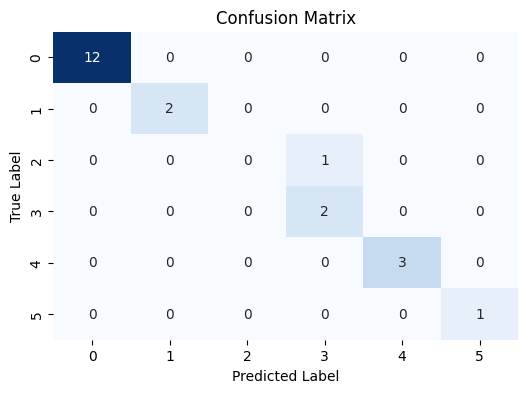

In [ ]:
#confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,cmap='Blues',fmt='d',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

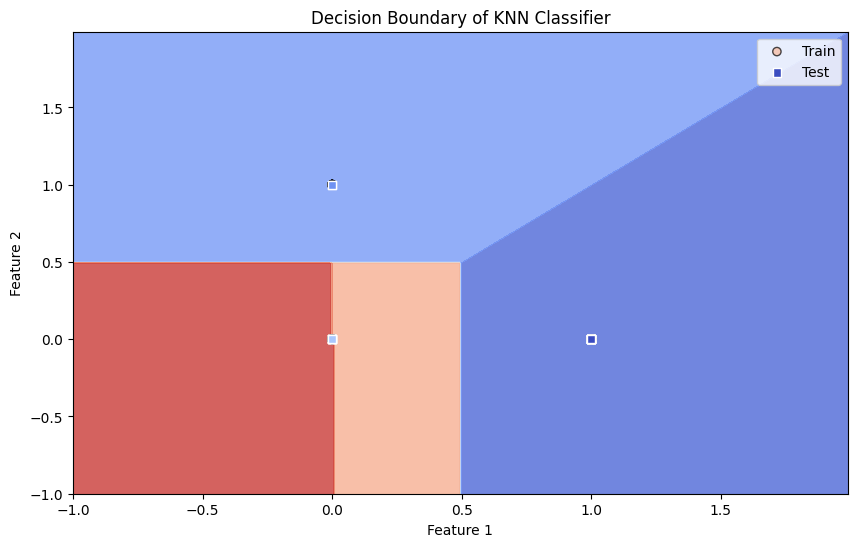

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Example: Assuming 'X' is your DataFrame with features and 'y' is the target variable.
# Select the first two features (for 2D visualization) and the target column.
X_vis = x.iloc[:, :2].values  # Convert to NumPy array to ensure consistency
y_vis = y.values  # Convert target to NumPy array if it's a DataFrame column

# Split the data into training and testing sets
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y_vis, test_size=0.2, random_state=42
)

# Train a KNN classifier
knn_vis = KNeighborsClassifier(n_neighbors=5)  # Adjust n_neighbors as needed
knn_vis.fit(X_train_vis, y_train_vis)

# Create a mesh grid for decision boundary visualization
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the class for each point on the grid
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])  # Use NumPy input for predictions
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot training and testing data points
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train_vis,
            edgecolor='k', marker='o', label='Train', cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test_vis,
            edgecolor='w', marker='s', label='Test', cmap=plt.cm.coolwarm, alpha=1.0)

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of KNN Classifier')
plt.legend()
plt.show()


**1. Key Hyperparameters in KNN**
The key hyperparameters in KNN include n_neighbors, which determines how many neighbors to consider for making predictions; weights, which controls how neighbor influence is calculated (uniformly or by distance); and algorithm, which specifies the method used to find nearest neighbors (e.g., auto, ball_tree, kd_tree).

**2. Distance Metrics Used in KNN**
KNN can use various distance metrics to evaluate the similarity between data points. Euclidean Distance is the most common, measuring straight-line distance. Manhattan Distance calculates distance as the sum of absolute differences in coordinates. Minkowski Distance generalizes these two and includes a parameter
